In [11]:
# Dependencies
import os
import csv
import json
import time
import requests
import pandas as pd
import numpy as np
import scipy.stats as sts
from pprint import pprint
from config import api_key
from citipy import citipy
import matplotlib.pyplot as plt

output_csv = os.path.join("../Resources","")
output_dir = os.path.join("../Figures","")

In [29]:
## Create latitudes and cities lists variables and initialize them as empty lists
cities = []
# Generate a list of cities using a random function up to 1500 in size for scanning
# Note: larger number of cities can be obtained with larger size, however for this task only about 500 are required
latitude = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitude = np.random.uniform(low=-180.000, high=180.000, size=2000)

latitudes_longitudes = zip(latitude, longitude)
count_cities_500 = 0
for latitude_longitude in latitudes_longitudes:
    city = citipy.nearest_city(latitude_longitude[0], latitude_longitude[1]).city_name
    # If city is not in cities, then append the city to the cities' list. Limit the city list to 500
    if city not in cities:
        if count_cities_500 < 600:
            cities.append(city)
            count_cities_500 += 1
        else:
            break
    else:
        continue
print(f"First five are listed here: {cities[:5]}...")
print(f"Total number of cities is limited to {len(cities)}")

First five are listed here: ['rikitea', 'mountain home', 'dikson', 'yambio', 'walvis bay']...
Total number of cities is limited to 600


In [33]:
# url for weather api
units = 'english'
url   = "http://api.openweathermap.org/data/2.5/weather?q="
url2  = "http://api.openweathermap.org/data/2.5/group?id=524901,703448,2643743&units=metric"
city_5_list      = cities[:5]
city_list        = []
temp_list        = []
lat_list         = []
long_list        = []
humid_list       = []
cloud_list       = []
wind_list        = []
city_id_list     = []
counter          = 0 # Use this counter to limit amount of calls without sleep
city_id          = 0 # Unique City Identifier number
total_city_count = 1 # Total count for the cities fetched
for city in cities:
    try:
        if counter < 50:
            query_test_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"
            response = requests.get(query_test_url).json()
            city_list.append(response["name"])
            city_id = response["id"]
            city_id_list.append(response["id"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            counter = counter + 1
            total_city_count = total_city_count + 1
        else:
            counter = 0
            time.sleep(2) # sleep for 2 seconds before restarting calling weather API
            print(f"********** Reset counter and wait for 2 seconds **********")
            city_id = response["id"]
            city_id_list.append(response["id"])
            city_list.append(response["name"])
            print(f"| #{total_city_count}: City {city.capitalize()} with ID ({city_id}) is found.")
            temp_list.append(response["main"]["temp"])
            lat_list.append(response["coord"]["lat"])
            long_list.append(response["coord"]["lon"])
            humid_list.append(response["main"]["humidity"])
            cloud_list.append(response["clouds"]["all"])
            wind_list.append(response["wind"]["speed"])
            total_city_count = total_city_count + 1
            continue
    except KeyError:
        print(f"City '{city.capitalize()}' was not found.")
print("=========================================")
print("Fetching data completed")
print("=========================================")

| #1: City Rikitea with ID (4030556) is found.
| #2: City Mountain home with ID (5601615) is found.
| #3: City Dikson with ID (1507390) is found.
| #4: City Yambio with ID (363656) is found.
| #5: City Walvis bay with ID (3359638) is found.
| #6: City Hermanus with ID (3366880) is found.
| #7: City Shipunovo with ID (1492160) is found.
| #8: City Kudahuvadhoo with ID (1337607) is found.
| #9: City Ushuaia with ID (3833367) is found.
| #10: City Shubarkuduk with ID (608271) is found.
| #11: City Bathsheba with ID (3374083) is found.
| #12: City Mataura with ID (6201424) is found.
| #13: City Vestmannaeyjar with ID (3412093) is found.
| #14: City Esperance with ID (2071860) is found.
| #15: City Busselton with ID (2075265) is found.
| #16: City Hilo with ID (5855927) is found.
| #17: City Punta arenas with ID (3874787) is found.
| #18: City Kaitangata with ID (2208248) is found.
| #19: City Chokurdakh with ID (2126123) is found.
| #20: City Uruzgan with ID (1131461) is found.
| #21: City

| #157: City Anadyr with ID (2127202) is found.
| #158: City Santo angelo with ID (3449696) is found.
| #159: City Cabedelo with ID (3404558) is found.
| #160: City Aksarka with ID (1512019) is found.
| #161: City Luwuk with ID (1637001) is found.
| #162: City Cabo san lucas with ID (3985710) is found.
| #163: City Pisco with ID (3932145) is found.
| #164: City Nioro with ID (2412408) is found.
| #165: City Buin with ID (3897774) is found.
| #166: City Carauari with ID (3664659) is found.
| #167: City Kanungu with ID (232287) is found.
| #168: City Old town with ID (4974231) is found.
| #169: City Carballo with ID (3126369) is found.
City 'Kamenskoye' was not found.
| #170: City Jamestown with ID (5122534) is found.
| #171: City Hithadhoo with ID (1282256) is found.
| #172: City Makakilo city with ID (5850554) is found.
| #173: City Shelbyville with ID (4657077) is found.
City 'Mys shmidta' was not found.
| #174: City Palmares with ID (3393264) is found.
| #175: City Nuevo progreso wit

| #308: City Dettingen with ID (2937904) is found.
| #309: City Dwarka with ID (1272140) is found.
| #310: City Ndele with ID (237379) is found.
| #311: City Cockburn town with ID (3576994) is found.
| #312: City Hauterive with ID (3013748) is found.
| #313: City Ust-kan with ID (1488190) is found.
| #314: City Santarem with ID (3389353) is found.
City 'Kleck' was not found.
| #315: City Namatanai with ID (2090021) is found.
| #316: City Boali with ID (2388720) is found.
| #317: City Koumac with ID (2140558) is found.
| #318: City Batagay with ID (2027044) is found.
| #319: City Itarema with ID (3393692) is found.
| #320: City Rockport with ID (4723422) is found.
| #321: City Khao yoi with ID (1152919) is found.
| #322: City Asau with ID (686090) is found.
| #323: City Isangel with ID (2136825) is found.
| #324: City Yulara with ID (6355222) is found.
| #325: City Pimenta bueno with ID (3924908) is found.
| #326: City Leshukonskoye with ID (535839) is found.
| #327: City Bucak with ID 

| #461: City Lumphat with ID (1830377) is found.
| #462: City Alot with ID (1278964) is found.
| #463: City Oktyabrskiy with ID (515879) is found.
| #464: City Neiafu with ID (4032420) is found.
| #465: City Kampot with ID (1831112) is found.
| #466: City Tahoua with ID (2439376) is found.
| #467: City Boueni with ID (1090467) is found.
| #468: City Outram with ID (1880252) is found.
| #469: City Chipata with ID (918702) is found.
| #470: City Hualmay with ID (3939761) is found.
| #471: City Mogadishu with ID (53654) is found.
| #472: City Vestmanna with ID (2610343) is found.
| #473: City Ampanihy with ID (1078553) is found.
| #474: City Richards bay with ID (962367) is found.
| #475: City Kaniama with ID (214389) is found.
| #476: City Lannion with ID (3007608) is found.
| #477: City Imbituba with ID (3461370) is found.
| #478: City Alta floresta with ID (6316343) is found.
| #479: City Tabou with ID (2281120) is found.
| #480: City Yuzhnyy with ID (1485627) is found.
| #481: City Ha

In [34]:
print(f"There are {len(cities)} cities in the 'cities' list.")

There are 600 cities in the 'cities' list.


In [50]:
# Create a dataframe from the collected data
weather_df = pd.DataFrame({'City': city_list,
                           'Temperature (DegF)': temp_list,
                           'Cloudiness (%)': cloud_list,
                           'Latitude': lat_list,
                           'Longitude': long_list,
                           'Humidity (%)': humid_list,
                           'Wind Speed (mps)': wind_list})
weather_df.to_csv(f"{output_csv} weather_data.csv", index = False)
weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Rikitea,297.56,100,-23.12,-134.97,84,6.00
1,Mountain Home,289.15,90,43.13,-115.69,51,3.10
2,Dikson,275.04,100,73.51,80.55,85,4.16
3,Yambio,292.18,73,4.57,28.40,96,1.90
4,Walvis Bay,291.15,0,-22.96,14.51,17,6.20


In [36]:
# Extract data for the northern hemisphere
northern_weather_df = weather_df.loc[weather_df['Latitude'] >= 0]
northern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
1,Mountain Home,289.15,90,43.13,-115.69,51,3.10
2,Dikson,275.04,100,73.51,80.55,85,4.16
3,Yambio,292.18,73,4.57,28.40,96,1.90
6,Shipunovo,292.92,82,52.16,82.22,61,7.04
7,Kudahuvadhoo,302.37,95,2.67,72.89,75,4.80


In [37]:
# Extract data for the southern hemisphere
southern_weather_df = weather_df.loc[weather_df['Latitude'] < 0]
southern_weather_df.head()

,City,Temperature (DegF),Cloudiness (%),Latitude,Longitude,Humidity (%),Wind Speed (mps)
0,Rikitea,297.56,100,-23.12,-134.97,84,6.00
4,Walvis Bay,291.15,0,-22.96,14.51,17,6.20
5,Hermanus,285.84,0,-34.42,19.23,47,3.95
8,Ushuaia,273.15,20,-54.80,-68.30,91,2.10
11,Mataura,282.04,0,-46.19,168.86,71,1.79


In [38]:
# Extract column data to use for a scatter plot
temp_north  = northern_weather_df['Temperature (DegF)']
humid_north = northern_weather_df['Humidity (%)']
cloud_north = northern_weather_df['Cloudiness (%)']
wind_north  = northern_weather_df['Wind Speed (mps)']
lat_north   = northern_weather_df['Latitude']

print(cloud_north[:5])

1     90
2    100
3     73
6     82
7     95
Name: Cloudiness (%), dtype: int64


In [39]:
# Extract data for the Southern hemisphere
temp_south  = southern_weather_df['Temperature (DegF)']
humid_south = southern_weather_df['Humidity (%)']
cloud_south = southern_weather_df['Cloudiness (%)']
wind_south  = southern_weather_df['Wind Speed (mps)']
lat_south   = southern_weather_df['Latitude']

print(cloud_south[:5])

0     100
4       0
5       0
8      20
11      0
Name: Cloudiness (%), dtype: int64


In [40]:
def plot_linear_regression(y_axis, x_axis, title, ylabel, xlabel):
    # Plot temperature vs. latitude for the Northern hemisphere
    plt.scatter(x_axis, y_axis)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m, b = np.polyfit(x_axis, y_axis, 1)
    plt.plot(x_axis, m*x_axis + b)
    plt.savefig(f"Figures/{title}.png")
    plt.show()
    # Identify Pearson value
    print(f"Pearson's correlation is = {round(sts.pearsonr(x_axis, y_axis)[0],2)} ({title}).")
#plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.



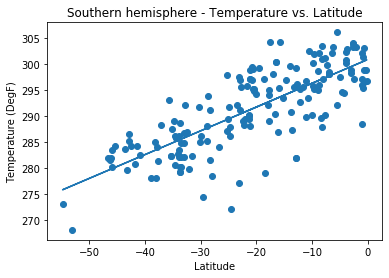

Pearson's correlation is = 0.77 (Southern hemisphere - Temperature vs. Latitude).


In [41]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear positive correlation between the temperature and the latitude.
This relationship shows that with the latitude approaching 0 deg, which is an equator, 
the temperature is increasing.
''')
plot_linear_regression(temp_south, lat_south, "Southern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.



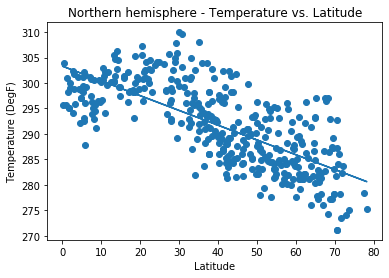

Pearson's correlation is = -0.72 (Northern hemisphere - Temperature vs. Latitude).


In [42]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, when looking at the Temperature vs. Latitude plot,
there is a clear negative correlation between the temperature and the latitude.
This relationship shows that with the latitude moving from 0 deg to the north pole, 
the temperature is decreasing.
''')
plot_linear_regression(temp_north, lat_north, "Northern hemisphere - Temperature vs. Latitude", "Temperature (DegF)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 



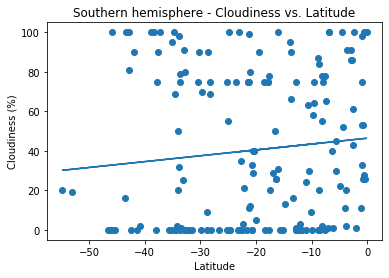

Pearson's correlation is = 0.1 (Southern hemisphere - Cloudiness vs. Latitude).


In [43]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average cloudiness is about 38%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more sunny days, - with 0% cloudiness. 
''')
plot_linear_regression(cloud_south, lat_south, "Southern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 



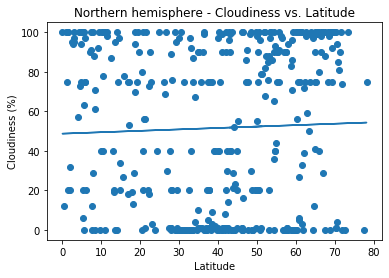

Pearson's correlation is = 0.04 (Northern hemisphere - Cloudiness vs. Latitude).


In [44]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average cloudiness is about 45%.
When looking at the Cloudiness vs. Latitude plot,
there is no clear correlation between the cloudiness and the latitude.
However, there appear to be more days that are located on the 0 and 100% readings. 
''')
plot_linear_regression(cloud_north, lat_north, "Northern hemisphere - Cloudiness vs. Latitude", "Cloudiness (%)", "Latitude")


 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere



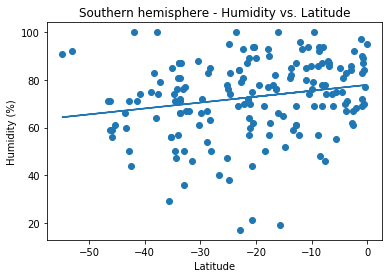

Pearson's correlation is = 0.2 (Southern hemisphere - Humidity vs. Latitude).


In [45]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average humidity is about 70%.
When looking at the plot there is no clear correlation.
Humidity is quite high throughout the southern hemisphere
''')
plot_linear_regression(humid_south, lat_south, "Southern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 



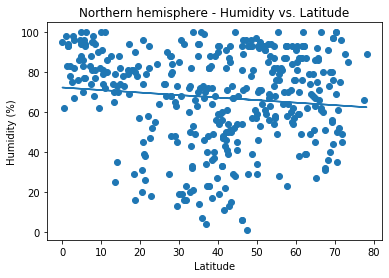

Pearson's correlation is = -0.11 (Northern hemisphere - Humidity vs. Latitude).


In [46]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average humidity is about 65%.
When looking at the plot, there is no clear correlation.
The humidity seems to be more evenly spread in the latitude range between 15 and 40 degrees. 
''')
plot_linear_regression(humid_north, lat_north, "Northern hemisphere - Humidity vs. Latitude", "Humidity (%)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.



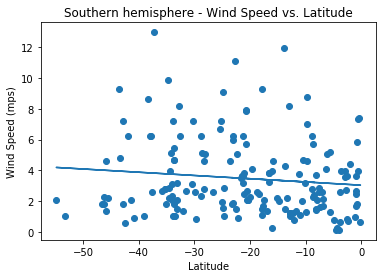

Pearson's correlation is = -0.11 (Southern hemisphere - Wind Speed vs. Latitude).


In [47]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Southern hemisphere, the average wind speed is about 3.3mps.
There are few days where the winds are stronger close to the equator.
''')
plot_linear_regression(wind_south, lat_south, "Southern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")

 
***** Review the plot below *****
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.



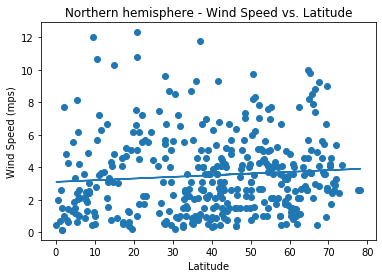

Pearson's correlation is = 0.08 (Northern hemisphere - Wind Speed vs. Latitude).


In [48]:
print(''' 
=================================
***** Review the plot below *****
=================================
In this time of the year.
In the Northern hemisphere, the average wind speed is about 3.8%, 
which is slightly higher than in the Southern hemisphere.
''')
plot_linear_regression(wind_north, lat_north, "Northern hemisphere - Wind Speed vs. Latitude", "Wind Speed (mps)", "Latitude")